In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

from sklearn.linear_model import LinearRegression

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE


# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [15]:
data = pd.read_csv("train.csv")

In [16]:
data.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,1,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,0,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,0,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,0,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,0,14,0,0,1,1,0,72048,0,1,0


In [17]:
data.shape

(134683, 21)

In [18]:
data.ndim

2

In [19]:
data.describe(exclude=object)

,Property_ID,room,price,area,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
count,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000
mean,96036.100777,2.029677,36690.033894,1480.388490,2.040488,0.534388,9.163087,0.527602,0.337051,0.472561,0.692626,0.440137,220248.014323,0.561838,0.595851,2033.024212
std,55565.228125,0.937308,62620.364025,1412.464718,0.867065,0.498818,5.957549,0.499239,0.472704,0.499248,0.461407,0.496405,420450.288624,0.496163,0.490728,1159.635981
min,2.000000,1.000000,1583.000000,81.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3180.000000,0.000000,0.000000,0.000000
25%,47940.000000,1.000000,12035.500000,759.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55802.500000,0.000000,0.000000,1100.000000
50%,95950.000000,2.000000,20856.000000,1114.000000,2.000000,1.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,114264.000000,1.000000,1.000000,2000.000000
75%,144194.500000,3.000000,36014.000000,1580.000000,2.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,220704.500000,1.000000,1.000000,3000.000000
max,192405.000000,5.000000,799325.000000,13942.000000,5.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7940780.000000,1.000000,1.000000,4000.000000


In [20]:
data.describe(include=object)

,layout_type,property_type,locality,furnish_type,city
count,134683,134683,134683,134683,134683
unique,2,6,3706,3,8
top,BHK,Apartment,Thane West,Semi-Furnished,Mumbai
freq,114684,86819,3127,63646,46910


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134683 entries, 0 to 134682
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Property_ID       134683 non-null  int64 
 1   room              134683 non-null  int64 
 2   layout_type       134683 non-null  object
 3   property_type     134683 non-null  object
 4   locality          134683 non-null  object
 5   price             134683 non-null  int64 
 6   area              134683 non-null  int64 
 7   furnish_type      134683 non-null  object
 8   bathroom          134683 non-null  int64 
 9   city              134683 non-null  object
 10  parking_spaces    134683 non-null  int64 
 11  floor             134683 non-null  int64 
 12  pet_friendly      134683 non-null  int64 
 13  power_backup      134683 non-null  int64 
 14  washing_machine   134683 non-null  int64 
 15  air_conditioner   134683 non-null  int64 
 16  geyser/solar      134683 non-null  int

In [22]:
data.locality.value_counts()

Thane West                                                 3127
Chembur                                                    2461
Andheri East                                               2377
Bopal                                                      2054
Kharghar                                                   1819
Andheri West                                               1653
Bandra West                                                1636
Kandivali East                                             1566
Saket                                                      1533
Powai                                                      1504
Wagholi                                                    1498
New Town                                                   1326
Gota                                                       1251
Ulwe                                                       1222
Goregaon East                                              1145
Near Nirma University On SG Highway     

In [23]:
data.isnull().sum()

Property_ID         0
room                0
layout_type         0
property_type       0
locality            0
price               0
area                0
furnish_type        0
bathroom            0
city                0
parking_spaces      0
floor               0
pet_friendly        0
power_backup        0
washing_machine     0
air_conditioner     0
geyser/solar        0
security_deposit    0
CCTV/security       0
lift                0
neighbourhood       0
dtype: int64

In [24]:
data.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,1,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,0,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,0,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,0,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,0,14,0,0,1,1,0,72048,0,1,0


In [25]:
data=data.drop('Property_ID',axis=1)

No handles with labels found to put in legend.


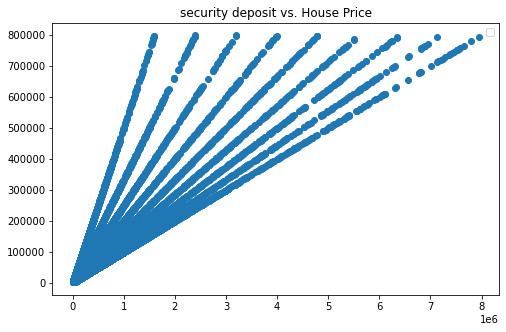

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(data['security_deposit'],data['price'])
plt.title("security deposit vs. House Price")
plt.legend()
plt.show()

No handles with labels found to put in legend.


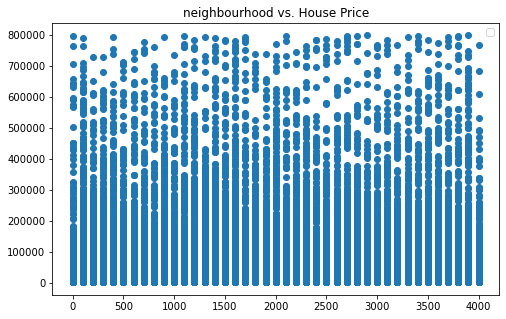

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(data['neighbourhood'],data['price'])
plt.title("neighbourhood vs. House Price")
plt.legend()
plt.show()

No handles with labels found to put in legend.


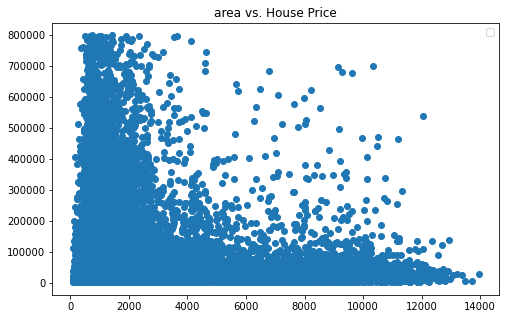

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(data['area'],data['price'])
plt.title("area vs. House Price")
plt.legend()
plt.show()

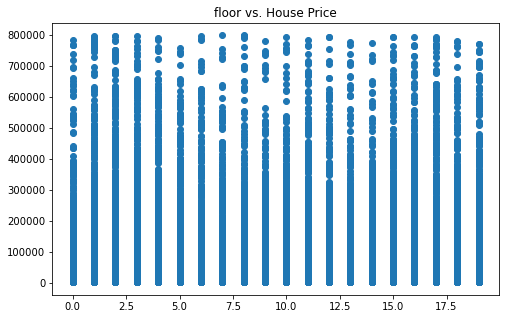

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(data['floor'],data['price'])
plt.title("floor vs. House Price")
#plt.legend()
plt.show()

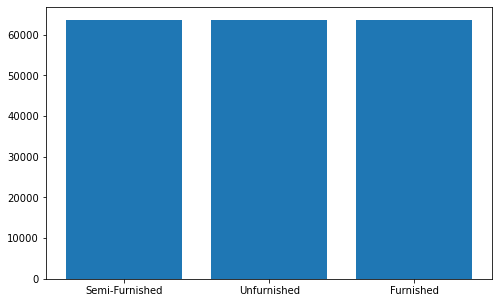

In [44]:
plt.figure(figsize=(8,5))
plt.bar(x=data['furnish_type'].value_counts().index,height=data['furnish_type'].value_counts()[0])
plt.show()

In [36]:
data['city'].value_counts()

Mumbai       46910
Delhi        22826
Bangalore    16092
Pune         15713
Ahmedabad    12976
Hyderabad     7334
Kolkata       6795
Chennai       6037
Name: city, dtype: int64

In [35]:
data['room'].value_counts()

1    47908
2    43235
3    36125
4     6465
5      950
Name: room, dtype: int64

In [26]:
data_num=data.select_dtypes(exclude='object')

In [27]:
data_num.head()

,room,price,area,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,3,33624,1312,2,1,1,1,0,0,1,0,302616,0,0,300
1,1,9655,1474,2,0,17,0,1,0,0,1,19310,0,1,1600
2,3,23699,1837,2,0,10,1,1,1,1,0,118495,0,1,3100
3,1,6306,606,1,0,18,0,0,0,0,0,37836,0,1,300
4,1,12008,498,3,0,14,0,0,1,1,0,72048,0,1,0


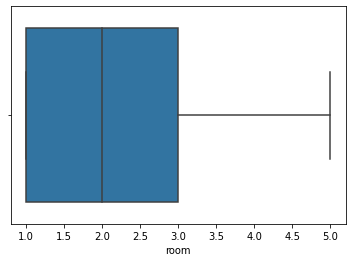

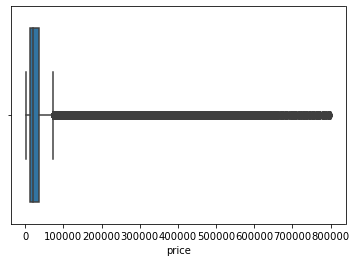

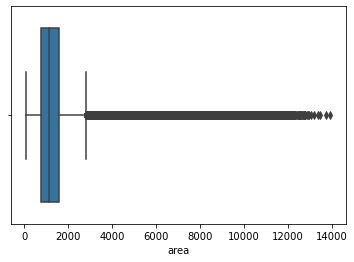

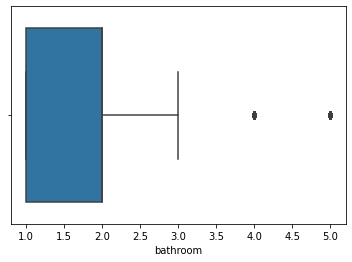

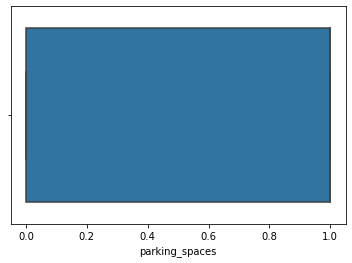

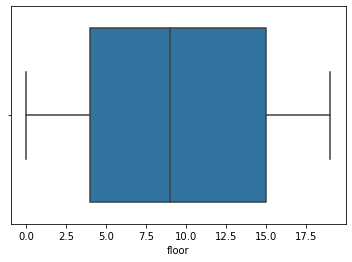

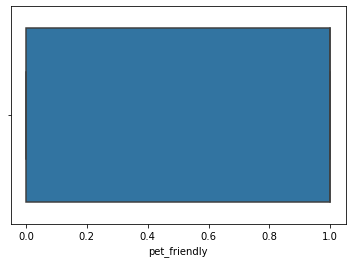

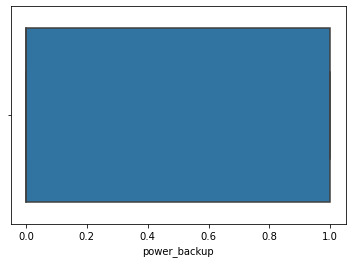

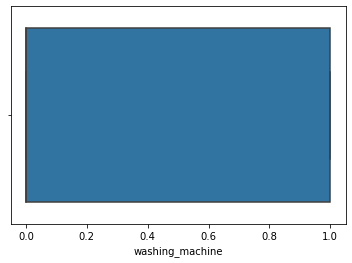

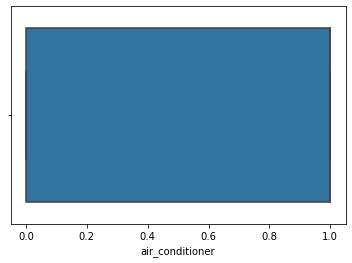

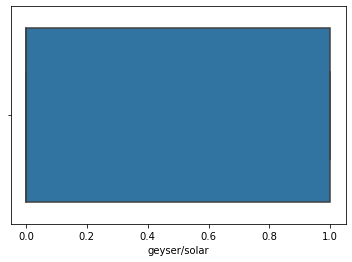

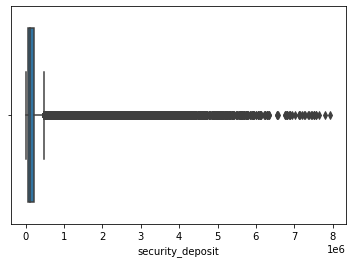

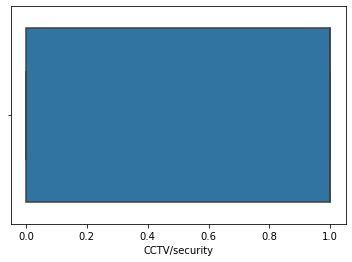

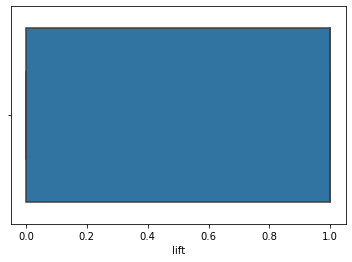

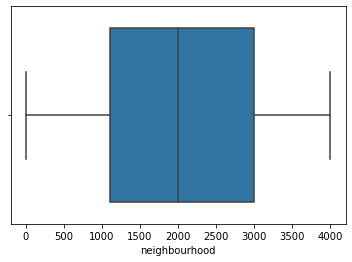

In [28]:
for col in data_num.columns:
    sns.boxplot(data_num[col])
    plt.show()


In [29]:
data_num.columns

Index(['room', 'price', 'area', 'bathroom', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood'],
      dtype='object')

In [30]:
data_num.skew()

room                0.496362
price               6.026451
area                3.871221
bathroom            0.962989
parking_spaces     -0.137881
floor               0.120626
pet_friendly       -0.110577
power_backup        0.689445
washing_machine     0.109921
air_conditioner    -0.834964
geyser/solar        0.241189
security_deposit    7.097458
CCTV/security      -0.249268
lift               -0.390654
neighbourhood       0.005587
dtype: float64

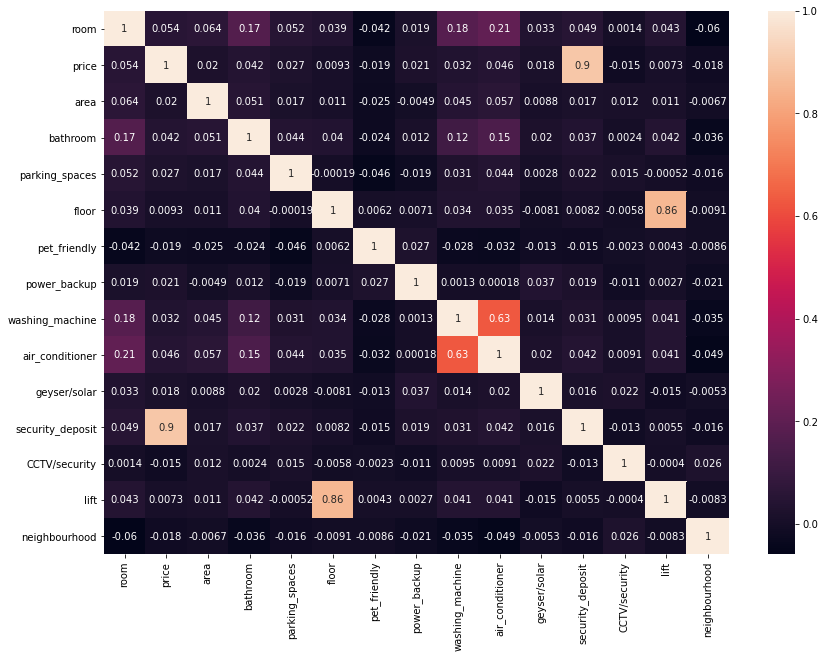

In [31]:
plt.figure(figsize=(14,10))
sns.heatmap(data_num.corr(),annot=True)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data_num.drop(['price','floor'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature      VIF
0               room 5.396242
1               area 2.052013
2           bathroom 5.741859
3     parking_spaces 2.074339
4       pet_friendly 1.964666
5       power_backup 1.482210
6    washing_machine 3.158099
7    air_conditioner 5.383762
8       geyser/solar 1.743844
9   security_deposit 1.274493
10     CCTV/security 2.166780
11              lift 2.356002
12     neighbourhood 3.318254


In [33]:
data=data.drop('floor',axis=1)
data.head()

,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,1,1,0,0,1,0,302616,0,0,300
1,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,0,0,1,0,0,1,19310,0,1,1600
2,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,0,1,1,1,1,0,118495,0,1,3100
3,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,0,0,0,0,0,0,37836,0,1,300
4,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,0,0,0,1,1,0,72048,0,1,0


In [34]:
data.skew()

room                0.496362
price               6.026451
area                3.871221
bathroom            0.962989
parking_spaces     -0.137881
pet_friendly       -0.110577
power_backup        0.689445
washing_machine     0.109921
air_conditioner    -0.834964
geyser/solar        0.241189
security_deposit    7.097458
CCTV/security      -0.249268
lift               -0.390654
neighbourhood       0.005587
dtype: float64

In [35]:
Q1 = data.drop('price',axis=1).quantile(.25)
Q3 = data.drop('price',axis=1).quantile(.75)
IQR = Q3-Q1
#dfiqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
dfiqr = data[~(data > (Q3 + 1.5 * IQR)).any(axis=1)]
dfiqr.head()

,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,1,1,0,0,1,0,302616,0,0,300
1,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,0,0,1,0,0,1,19310,0,1,1600
2,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,0,1,1,1,1,0,118495,0,1,3100
3,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,0,0,0,0,0,0,37836,0,1,300
4,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,0,0,0,1,1,0,72048,0,1,0


In [36]:
dfiqr.shape

(105499, 19)

In [37]:
dfiqr.skew()

room                0.514215
price               2.863989
area                0.942427
bathroom            0.131017
parking_spaces     -0.120734
pet_friendly       -0.125005
power_backup        0.703335
washing_machine     0.112579
air_conditioner    -0.812168
geyser/solar        0.250847
security_deposit    1.140501
CCTV/security      -0.257838
lift               -0.380815
neighbourhood       0.004254
dtype: float64

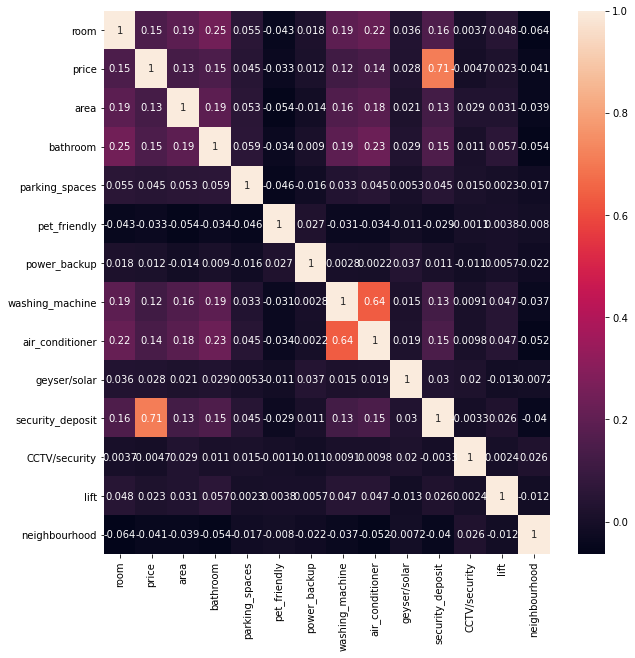

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(dfiqr.corr(),annot=True)
plt.show()

In [39]:
dfiqr.columns

Index(['room', 'layout_type', 'property_type', 'locality', 'price', 'area',
       'furnish_type', 'bathroom', 'city', 'parking_spaces', 'pet_friendly',
       'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar',
       'security_deposit', 'CCTV/security', 'lift', 'neighbourhood'],
      dtype='object')

In [40]:
from sklearn.preprocessing import StandardScaler
standard_scale = StandardScaler()
# df_scaled = standard_scale.fit_transform(dfiqr[['area','security_deposit','neighbourhood']])
# df_scaled = pd.DataFrame(df_scaled,columns=['area','security_deposit','neighbourhood']).reset_index(drop=True)
# df_scaled.head()
df_scaled =dfiqr[['area','security_deposit','neighbourhood']].copy().reset_index(drop=True)
df_scaled.head()

,area,security_deposit,neighbourhood
0,1312,302616,300
1,1474,19310,1600
2,1837,118495,3100
3,606,37836,300
4,498,72048,0


In [41]:
df_scaled.shape

(105499, 3)

In [42]:
dummy_columns=pd.get_dummies(dfiqr[['layout_type', 'property_type','furnish_type','city']],drop_first=True).reset_index(drop=True)
dummy_columns.head()

,layout_type_RK,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,furnish_type_Semi-Furnished,furnish_type_Unfurnished,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [43]:
dummy_columns.shape

(105499, 15)

In [44]:
df_rem=dfiqr[['parking_spaces', 'pet_friendly',
       'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift']].copy().reset_index(drop=True)
df_final=pd.concat([df_scaled,dummy_columns,df_rem],axis=1).reset_index(drop=True)
df_final.shape

(105499, 26)

In [45]:
df_final.head()

,area,security_deposit,neighbourhood,layout_type_RK,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,furnish_type_Semi-Furnished,furnish_type_Unfurnished,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,parking_spaces,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,CCTV/security,lift
0,1312,302616,300,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
1,1474,19310,1600,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
2,1837,118495,3100,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1
3,606,37836,300,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,498,72048,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1


In [46]:
encoding = dfiqr.groupby('locality').size()
encoding = encoding/len(dfiqr)
dfiqr['freq_encoded_locality'] = dfiqr.locality.map(encoding)
dfiqr.head()

,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,freq_encoded_locality
0,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,1,1,0,0,1,0,302616,0,0,300,0.000360
1,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,0,0,1,0,0,1,19310,0,1,1600,0.002171
2,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,0,1,1,1,1,0,118495,0,1,3100,0.000104
3,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,0,0,0,0,0,0,37836,0,1,300,0.018218
4,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,0,0,0,1,1,0,72048,0,1,0,0.000057


In [47]:
df_encoded=pd.DataFrame(dfiqr['freq_encoded_locality'].copy()).reset_index(drop=True)
df_encoded.shape

(105499, 1)

In [48]:
df_final=pd.concat([df_final,df_encoded],axis=1).reset_index(drop=True)
df_final.shape

(105499, 27)

In [49]:
dfiqr.price.shape

(105499,)

In [50]:
X = df_final.copy()
y = dfiqr.price.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(84399, 27)
(21100, 27)
(84399,)
(21100,)


In [51]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

# Feature Selection

In [52]:
linreg = LinearRegression()
linreg_forward = sfs(estimator=linreg, k_features = 'best', forward=True,
                     verbose=2, scoring='r2')
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.6s finished

[2022-06-09 14:21:58] Features: 1/27 -- score: 0.5013755700829051[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.8s finished

[2022-06-09 14:21:59] Features: 2/27 -- score: 0.5028636458122506[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.9s finished

[2022-06-09 14:22:00] Features: 3/27 -- score: 0.5036396042037906[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [54]:
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('area', 'security_deposit', 'neighbourhood', 'layout_type_RK', 'property_type_Studio Apartment', 'property_type_Villa', 'furnish_type_Unfurnished', 'city_Bangalore', 'city_Chennai', 'city_Delhi', 'city_Hyderabad', 'city_Kolkata', 'city_Mumbai', 'city_Pune', 'parking_spaces', 'pet_friendly', 'power_backup', 'geyser/solar')

R-Squared:  0.5044835322776223


In [55]:
X = df_final[['area', 'security_deposit', 'neighbourhood', 'layout_type_RK', 'property_type_Studio Apartment', 'property_type_Villa', 'furnish_type_Unfurnished', 'city_Bangalore', 'city_Chennai', 'city_Delhi', 'city_Hyderabad', 'city_Kolkata', 'city_Mumbai', 'city_Pune', 'parking_spaces', 'pet_friendly', 'power_backup', 'geyser/solar']].copy()
y = dfiqr.price.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(94949, 18)
(10550, 18)
(94949,)
(10550,)


In [56]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

# Hyperparameter Tuning

In [57]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
#print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.001, 'l1_ratio': 0.01} 



In [58]:
enet = ElasticNet(alpha= 0.001, l1_ratio= 0.01)

In [59]:
model=enet.fit(X_train, y_train)
pred=model.predict(X_test)


In [60]:
score = rmse(y_test, pred)
score

13141.639984851634

In [61]:
y_train_pred=model.predict(X_train)
score = rmse(y_train, y_train_pred)
score

13813.095872221003

In [75]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'alpha',
 'coef_',
 'copy_X',
 'dual_gap_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'l1_ratio',
 'max_iter',
 'n_features_in_',
 'n_iter_',
 'normalize',
 'path',
 'positive',
 'precompute',
 'predict',
 'random_state',
 'score',
 'selection',
 'set_params',
 'sparse_coef_',
 'tol',
 'warm_start']

# Testing

In [121]:
testdf=pd.read_csv('test.csv')
testdf.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,114342,2,BHK,Independent Floor,Palava,1347,Semi-Furnished,1,Mumbai,0,2,0,1,1,1,0,72624,1,0,900,nan
1,88819,1,BHK,Independent House,Somajiguda,634,Semi-Furnished,3,Hyderabad,1,4,0,0,1,1,0,19656,0,0,2500,nan
2,85623,1,BHK,Apartment,Toli Chowki,524,Unfurnished,1,Hyderabad,1,3,1,1,0,0,0,7500,0,0,3200,nan
3,130856,3,BHK,Apartment,Thane West,1837,Unfurnished,5,Mumbai,1,9,1,0,0,0,1,137646,1,1,1200,nan
4,40089,2,BHK,Apartment,Krishnarajapura,1208,Semi-Furnished,2,Bangalore,1,17,0,1,1,1,0,110898,0,1,1000,nan


In [122]:
testdf=testdf.drop(['Property_ID','floor'],axis=1)

In [123]:
from sklearn.preprocessing import StandardScaler
standard_scale = StandardScaler()


df_num =testdf[['area','security_deposit','neighbourhood']].copy().reset_index(drop=True)
df_num.head()

,area,security_deposit,neighbourhood
0,1347,72624,900
1,634,19656,2500
2,524,7500,3200
3,1837,137646,1200
4,1208,110898,1000


In [125]:
dummy_columns=pd.get_dummies(testdf[['layout_type', 'property_type','furnish_type','city']],drop_first=True).reset_index(drop=True)
dummy_columns.head()

,layout_type_RK,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,furnish_type_Semi-Furnished,furnish_type_Unfurnished,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune
0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [126]:
df_rem=testdf[['parking_spaces', 'pet_friendly',
       'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar', 'CCTV/security', 'lift']].copy().reset_index(drop=True)
df_final=pd.concat([df_num,dummy_columns,df_rem],axis=1).reset_index(drop=True)
df_final.shape

(57722, 26)

In [127]:
encoding = testdf.groupby('locality').size()
encoding = encoding/len(testdf)
testdf['freq_encoded_locality'] = testdf.locality.map(encoding)

df_encoded=pd.DataFrame(testdf['freq_encoded_locality'].copy()).reset_index(drop=True)

df_final=pd.concat([df_final,df_encoded],axis=1).reset_index(drop=True)
df_final.shape

(57722, 27)

In [128]:
X = df_final[['area', 'security_deposit', 'neighbourhood', 'layout_type_RK', 'property_type_Studio Apartment', 'property_type_Villa', 'furnish_type_Unfurnished', 'city_Bangalore', 'city_Chennai', 'city_Delhi', 'city_Hyderabad', 'city_Kolkata', 'city_Mumbai', 'city_Pune', 'parking_spaces', 'pet_friendly', 'power_backup', 'geyser/solar']].copy()
X.head()

,area,security_deposit,neighbourhood,layout_type_RK,property_type_Studio Apartment,property_type_Villa,furnish_type_Unfurnished,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune,parking_spaces,pet_friendly,power_backup,geyser/solar
0,1347,72624,900,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,634,19656,2500,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,524,7500,3200,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0
3,1837,137646,1200,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1
4,1208,110898,1000,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [129]:
X.shape

(57722, 18)

In [130]:
predicted_price = model.predict(X)
predicted_price[:10]

array([16486.90815056,  8528.36913724,  5488.17985437, 24768.33072441,
       22709.798814  , 43166.82486128, 16894.84584681,  8266.65832152,
       33233.88372921, 77716.75415259])

In [131]:
pd.DataFrame(predicted_price).to_csv('final_predictions.csv')